__IMPORTING LIB__

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

__IMPORTING DATA SET AND ANALYSIS__

In [3]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [4]:
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df ['label'] = breast_cancer_dataset.target

In [7]:
df.shape

(569, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [10]:
# Benign = 1
# Malignant = 0

df ['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [11]:
df.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


__SPLITING FEATURES & LABELS__

In [12]:
X = df.drop(columns = 'label', axis = 1)
Y = df['label']

In [13]:
print (Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


__SPLITTING DATA INTO TRAINING AND TESTING SETS__

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [15]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


__INITIALIZING LOGISTIC REGRESSION MODEL__

In [16]:
model = LogisticRegression()

In [17]:
model.fit(X_train, Y_train)

/home/dawood/Documents/SML Model/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


__MAKING PREDICTIONS ON TRAINING DATA__

In [18]:
X_train_Predict = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_Predict)

In [19]:
print ('Accuracy of training data : ' ,training_data_accuracy)

Accuracy of training data :  0.9494505494505494


__MAKING PREDICTIONS ON TESTING DATA__

In [20]:
X_test_Predict = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_Predict) 

In [21]:
print ('Accuracy of test data : ' , test_data_accuracy)

Accuracy of test data :  0.9298245614035088


__MAKING PREDICTIONS ON INPUT DATA__

In [28]:
input_data = (19.55,23.21,128.9,1174,0.101,0.1318,0.1856,0.1021,0.1989,0.05884,0.6107,2.836,5.383,70.1,0.01124,0.04097,0.07469,0.03441,0.02768,0.00624,20.82,30.44,142,1313,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602)

# CONVERT INPUT DATA TO NUMPY ARRAY
input_np_array = np.asarray(input_data).reshape(1, -1)

# MAKE PREDICTION USING THE MODEL
prediction = model.predict(input_np_array)

# RESULT BASED ON THE PREDICTION
result = "Benign" if prediction[0] == 1 else "Malignant"

print (result)


Malignant


/home/dawood/Documents/SML Model/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


__VISUALIZING PREDICTION__

*PIE CHART TO VISUALIZE*

/home/dawood/Documents/SML Model/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


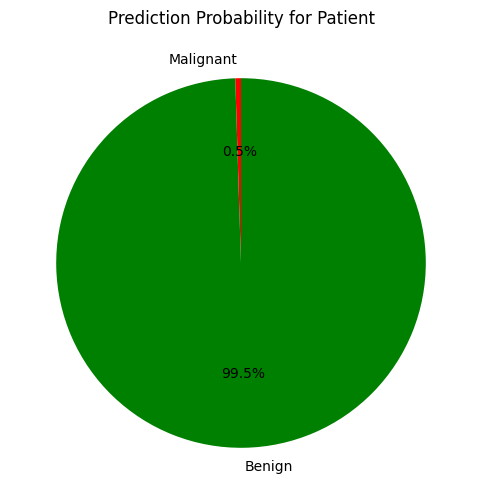

In [23]:
proba = model.predict_proba(input_np_array)[0]

plt.figure(figsize=(6,6))
plt.pie(proba, labels=["Malignant", "Benign"], autopct="%1.1f%%", 
        colors=["red", "green"], startangle=90)
plt.title("Prediction Probability for Patient")
plt.show()

*HISTOGRAM TO VISUALIZE*

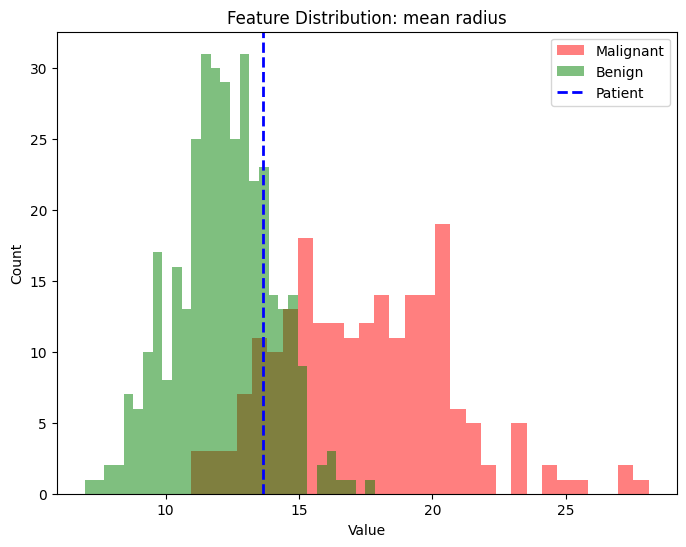

In [24]:
feature_index = 0
plt.figure(figsize=(8,6))
plt.hist(df[df['label']==0].iloc[:, feature_index], bins=30, alpha=0.5, color="red", label="Malignant")
plt.hist(df[df['label']==1].iloc[:, feature_index], bins=30, alpha=0.5, color="green", label="Benign")
plt.axvline(input_data[feature_index], color="blue", linestyle="--", linewidth=2, label="Patient")
plt.title(f"Feature Distribution: {breast_cancer_dataset.feature_names[feature_index]}")
plt.xlabel("Value")
plt.ylabel("Count")
plt.legend()
plt.show()